# Pitching Analysis Script

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pand
import plotly.graph_objects as go

In [36]:
pitcher_name = 'Everett-Wonson'
df = pand.read_excel('Pitching Data.xlsx', usecols="A:K", sheet_name=pitcher_name)

In [37]:
    
    x_loc = {1:1, 2:2, 3:3, 4:1,5:2, 6:3,7:1,8:2,9:3,10:1,11:2,12:3,13:4,
            14:4,15:4,16:4,17:4,18:3,19:2,20:1,21:0,22:0,23:0,24:0,25:0}
    y_loc = {1:3, 2:3, 3:3, 4:2,5:2, 6:2,7:1,8:1,9:1,10:4,11:4,12:4,13:4,
            14:3,15:2,16:1,17:0,18:0,19:0,20:0,21:0,22:1,23:2,24:3,25:4}

# Pitch Usage Data

In [38]:
def usage(pitch_type, dataframe):
    num_pitches = dataframe[dataframe['Type'] == pitch_type].size
    return num_pitches

In [39]:
def usage_per(pitch_type, dataframe):
    total_usage = usage(pitch_type, dataframe)
    usage_per = total_usage/dataframe.size
    return usage_per

In [40]:
def plot_pitches(dataframe, title):
    groups = dataframe.groupby('Type')
    
    for name, group in groups:
        x = group['Location'].map(x_loc)
        y = group['Location'].map(y_loc)
        locs = pand.DataFrame([x,y])
        plt.scatter(x, y, label=name)
        #heatmap = sn.heatmap(data = locs)

    rect = patches.Rectangle((1,1), 3, 3, fill=False, color="red")
    plt.gca().add_patch(rect)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show()

# Velocity Data

In [41]:
def velo_pt(dataframe):

    d = {'Velocity' : dataframe.loc[:,"Velocity"], 'Type' : dataframe.loc[:,"Type"]}
    
    frame = pand.DataFrame(data = d)
    
    frame.head()
    
    frame.boxplot(column='Velocity', by='Type')
        

# Pitch charts for all pitches in 2022 season by pitch type

# Strike % by Pitch Type

In [42]:
def strike_percentage(type, df):
    all_type = df[df['Type'] == type]
    all_strikes = all_type[all_type['Call'] == 'S']
    if not all_type.empty:
        strike_percent = all_strikes.size/all_type.size
    else:
        strike_percent = None
    return strike_percent

# Pitch charts for all pitches in 2022 season by count

In [43]:
def total_usage(df):
    pitch_usage = np.array([usage('FB', df), usage('CH', df), usage('SL', df), usage('CV', df), usage('SP', df), usage('CT', df)])

    plt.pie(pitch_usage, labels=['FB', 'CH','SL', 'CV', 'SP', 'CT'], autopct='%1.1f%%')
    plt.title("Pitch Usage %")
    plt.show()

In [44]:
def filter_by_count(balls, strikes, df):
    count = df[df['Balls'] == balls]
    count = count[count['Strikes'] == strikes]
    return count
    

In [45]:
def usage_percentage_by_count(balls, strikes, df):
    count = filter_by_count(balls, strikes, df)
    if not count.empty:
        pitch_usage = np.array([usage('FB', count), usage('CH', count), usage('SL', count), usage('CV', count), usage('CT', count)])

        plt.pie(pitch_usage, labels=['FB', 'CH','SL', 'CV', 'CT'], autopct='%1.1f%%')
        plt.title("Pitch Usage Percentage in %s - %s counts"%(balls, strikes))
        plt.show()

In [46]:
def usage_all_counts(df):
    for balls in range(0,4):
        for strikes in range(0,3):
            filtered = df
            usage_percentage_by_count(balls, strikes, filtered)

In [47]:
def plot_all_pitches(df):
    for balls in range(0,4):
        for strikes in range(0,3):
            filtered = filter_by_count(balls, strikes, df)
            if not filtered.empty:
                title = "All Pitches in %d - %d count"%(balls, strikes)
                plot_pitches(filtered, title)
        

In [48]:
def plot_all_types(df):
    plot_pitches(df, "All Pitch Types")
    groups = df.groupby('Type')
    
    colorscale = [[0,'light blue'], [1,'red']]

    
    for name, group in groups:
        x = group['Location'].map(x_loc)
        y = group['Location'].map(y_loc)
        z = group.count()
        
        fig = go.Figure(data = go.Contour(z = z, x = x, y = y, contours_coloring='heatmap', colorscale=colorscale))
        fig.update_layout({"height":540,"width":540})
        fig.show()
        
        #plt.scatter(x, y, label=name)


# Whiff% by pitch type

In [49]:
def whiff_percentage(type, df):
    all_type = df[df['Type'] == type]
    all_type = df[df['Live'] == 'Y']
    all_swinging = all_type[all_type['Swinging'] == 'Y']
    all_whiffs = all_swinging[all_swinging['EV'].isna()]
    if not all_swinging.empty:
        whiff_percent = all_whiffs.size/all_swinging.size
    else:
        whiff_percent = None
    return whiff_percent

## CSW%

In [50]:
def csw(type, dataframe):
    csw_per = -1
    if(type == "ALL"):
        all_swinging_strikes = dataframe[(dataframe['Swinging'] == 'Y') & (dataframe['Outcome'].isna())]
        all_swinging_strikes = all_swinging_strikes[all_swinging_strikes['Live'] == 'Y']
        all_called_strikes = dataframe[(dataframe['Call'] == 'S') & (dataframe['Swinging'] == 'N')]
        all_called_strikes = all_called_strikes[all_called_strikes['Live'] == 'Y']
        total_strikes = all_swinging_strikes.size + all_called_strikes.size
        csw_per= total_strikes/dataframe.size
    else:
        of_pitch_type = dataframe[dataframe['Type'] == type]
        all_swinging_strikes = of_pitch_type[(of_pitch_type['Swinging'] == 'Y') & (of_pitch_type['Outcome'].isna())]
        all_called_strikes = of_pitch_type[(of_pitch_type['Call'] == 'S') & (of_pitch_type['Swinging'] == 'N')]
        total_strikes = all_swinging_strikes.size + all_called_strikes.size
        if not of_pitch_type.empty:
            csw_per= total_strikes/of_pitch_type.size
        else:
            csw_per = None
    return csw_per

# Batted Ball Profiles

## FB/GB/LD Percentages

### All Pitch Types

In [51]:
def balls_in_play(dataframe):
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

### By Pitch Type

In [52]:
def fb_gb_ld_by_pitch_type(dataframe, pitch_type):
    dataframe = dataframe[dataframe['Type'] == pitch_type]
    fb = dataframe[dataframe.Outcome.eq('FB')]
    gb = dataframe[dataframe.Outcome.eq('GB')]
    ld = dataframe[dataframe.Outcome.eq('LD')]
    
    total_size = fb.size + gb.size + ld.size
    fb_per = fb.size/total_size
    gb_per = gb.size/total_size
    ld_per = ld.size/total_size
    return fb_per, gb_per, ld_per

# Figures

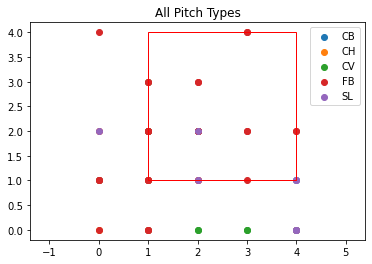

In [53]:
plot_all_types(df)

## By Count

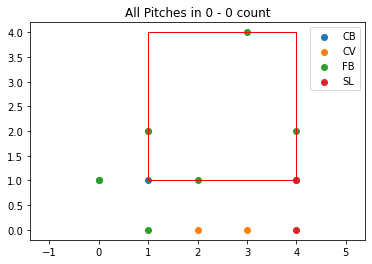

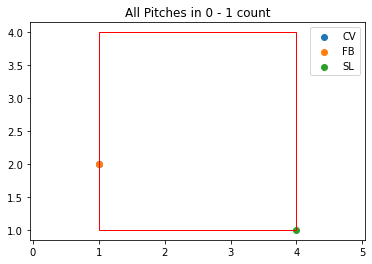

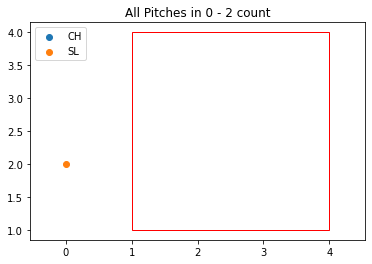

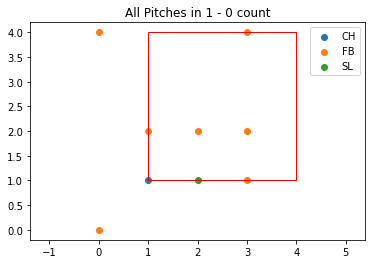

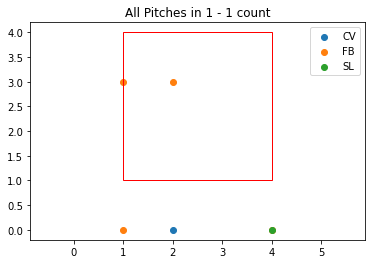

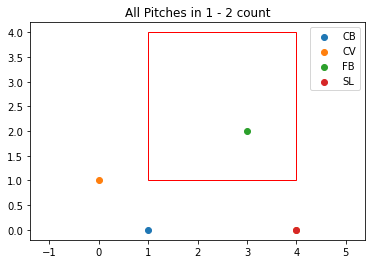

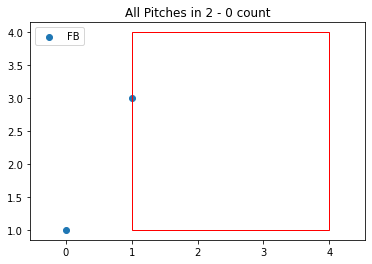

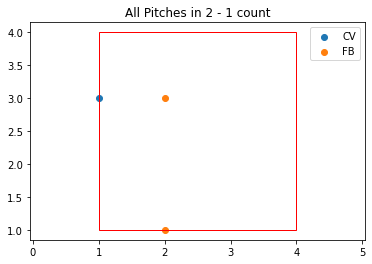

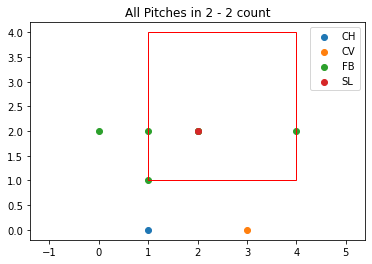

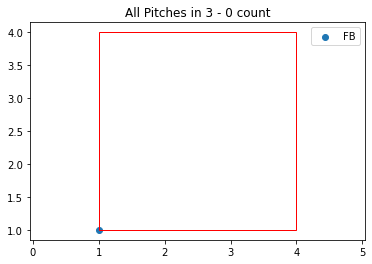

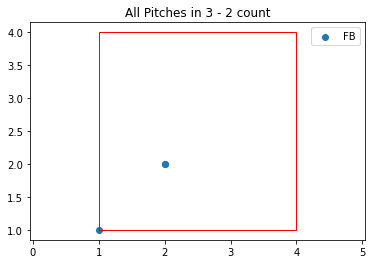

In [54]:
plot_all_pitches(df)

## By Pitch

In [55]:
by_pitch_stats = pand.DataFrame({'Usage%': [usage_per('FB', df), usage_per('SL', df), usage_per('CH', df),usage_per('CV', df),usage_per('SP', df)],
                                'Strike%': [strike_percentage('FB', df), strike_percentage('SL', df), strike_percentage('CH', df),strike_percentage('CV', df),strike_percentage('SP', df)],
                                'CSW%': [csw('FB', df), csw('SL', df), csw('CH', df),csw('CV', df), csw('SP', df)]},
                               index=['FB', 'SL','CH', 'CV', 'SP'])

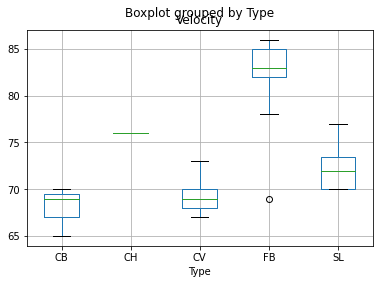

In [56]:
velo_pt(df)

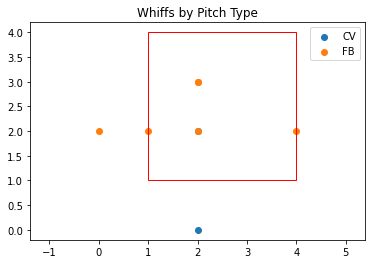

In [57]:
whiff = df[df['Swinging'] == 'Y']
whiff = whiff[whiff['Outcome'].isna()]

plot_pitches(whiff, "Whiffs by Pitch Type")


groups = df.groupby('Type')

for name, group in groups:
    fb, gb, ld = fb_gb_ld_by_pitch_type(df, name)
    y = np.array([fb, gb, ld])
    
    plt.pie(y, labels=['FB', 'GB','LD'], autopct='%1.1f%%')
    plt.title("FB/GB/LD% for Pitch Type = {:s}".format(name))
    plt.show()

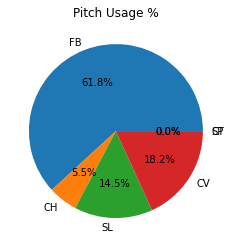

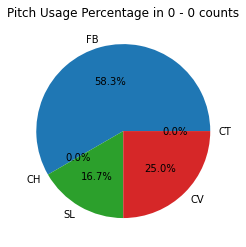

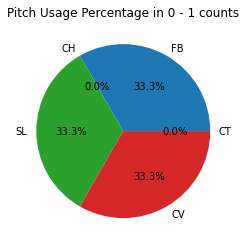

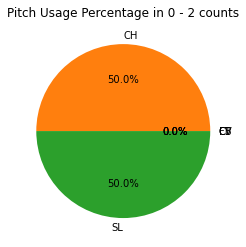

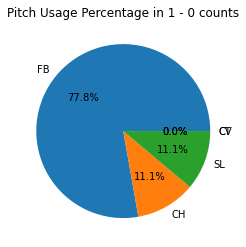

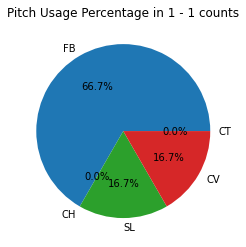

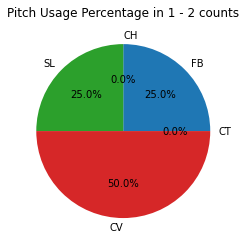

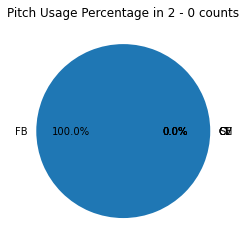

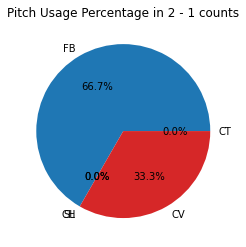

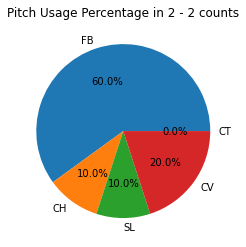

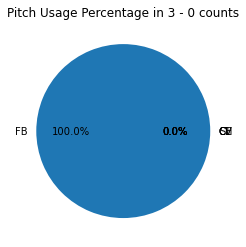

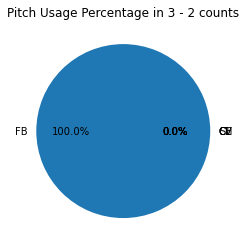

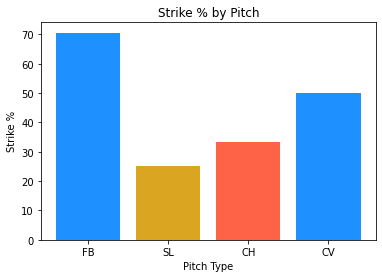

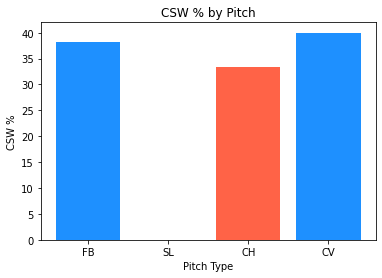

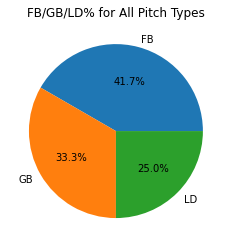

In [58]:
total_usage(df)
usage_all_counts(df)

plt.bar(by_pitch_stats.index, by_pitch_stats['Strike%']*100, color=['dodgerblue', 'goldenrod', 'tomato'])
plt.title('Strike % by Pitch')
plt.ylabel('Strike %')
plt.xlabel('Pitch Type')
plt.show()

plt.bar(by_pitch_stats.index, by_pitch_stats['CSW%']*100, color=['dodgerblue', 'goldenrod', 'tomato'])
plt.title('CSW % by Pitch')
plt.ylabel('CSW %')
plt.xlabel('Pitch Type')
plt.show()

fb, gb, ld = balls_in_play(df)
y = np.array([fb, gb, ld])
plt.pie(y, labels=['FB', 'GB','LD'], autopct='%1.1f%%')
plt.title("FB/GB/LD% for All Pitch Types")
plt.show()

# MLB Comps

In [59]:
mlb_pitchers_2021 = pand.read_excel('mlb_pitchers_2021.xlsx', usecols="A:J")

window = 2.5

In [60]:
def sim_fb_usage(dataframe, window):
    fb_usage = (usage('FB', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['fastball'].between(fb_usage-window, fb_usage+window)]
    return sim_mlb

In [61]:
def sim_ch_usage(dataframe, window):
    ch_usage = (usage('CH', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['changeup'].between(ch_usage-window, ch_usage+window)]
    return sim_mlb

In [62]:
def sim_sl_usage(dataframe, window):
    sl_usage = (usage('SL', dataframe)/dataframe.size)*100
    sim_mlb = mlb_pitchers_2021[mlb_pitchers_2021['slider'].between(sl_usage-window, sl_usage+window)]
    return sim_mlb

## MLB Pitchers With Similar Pitch Usage Profiles

In [63]:
def construct_savant_url(dataframe):
    for index, row in dataframe.iterrows():
        print("Baseball Savant URL for {:s} {:s}: ".format(row['first'], row['last']))
        first_name = row['first'].lower().strip()
        last_name = row['last'].lower().strip()
        id = str(row['pitcher'])
        url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-pitching-mlb'
        print(url)


In [64]:
mlb_comps= sim_fb_usage(df, window).merge(sim_ch_usage(df, window), on='pitcher', how='inner').merge(sim_sl_usage(df, window), on='pitcher', how='inner', sort=True)
mlb_comps = mlb_comps[['last', 'first','pitcher', 'fastball', 'slider', 'changeup', 'curve', 'splitter']]
print("Our pitcher's usage profile: FB: {: 0.2f}%, SL: {: 0.2f}%, CH: {: 0.2f}%\nComparable Pitchers in MLB:".format(usage('FB', df)/df.size*100, usage('SL', df)/df.size*100, usage('CH', df)/df.size*100))
print(mlb_comps)
print()
construct_savant_url(mlb_comps)

Our pitcher's usage profile: FB:  58.62%, SL:  13.79%, CH:  5.17%
Comparable Pitchers in MLB:
Empty DataFrame
Columns: [last, first, pitcher, fastball, slider, changeup, curve, splitter]
Index: []



## Identifying High-Performing Pitchers with Similar Arsenals 

In [65]:
pitchers_stats_2021 = pand.read_excel('expected_stats_2021.xlsx', usecols="A:G")

In [66]:
#Filter out pitchers with different arsenals
sim_arsenals = mlb_pitchers_2021[(mlb_pitchers_2021['fastball'] > 20) & (mlb_pitchers_2021['changeup'] > 10) & (mlb_pitchers_2021['slider'] > 20) & (mlb_pitchers_2021['curve'] < 5)]
sim_arsenals = pitchers_stats_2021.merge(sim_arsenals, on='pitcher')
sim_arsenals = sim_arsenals.sort_values('estwoba')
print(sim_arsenals)

        last_x   first_x  pitcher  estba  estslg  estwoba  xera      last_y  \
0     Iglesias    Raisel   628452  0.190   0.331    0.243  2.45    Iglesias   
1       Tepera      Ryan   572193  0.171   0.280    0.249  2.58      Tepera   
2       RodÃ³n    Carlos   607074  0.189   0.314    0.254  2.68      RodÃ³n   
3          May    Trevor   543507  0.192   0.349    0.264  2.90         May   
4      Giolito     Lucas   608337  0.221   0.362    0.280  3.27     Giolito   
5      GarcÃ­a   JarlÃ­n   606424  0.222   0.367    0.281  3.30     GarcÃ­a   
6       Watson      Tony   453265  0.223   0.359    0.283  3.35      Watson   
7    Boxberger      Brad   502202  0.203   0.348    0.286  3.42   Boxberger   
8    Alcantara     Sandy   645261  0.232   0.369    0.288  3.47   Alcantara   
9       Alcala     Jorge   660896  0.226   0.404    0.293  3.60      Alcala   
10       Wells     Tyler   669330  0.222   0.418    0.293  3.60       Wells   
11       Cessa      Luis   570666  0.251   0.374    

In [67]:
# Take top 10 guys from list
sim_arsenals = sim_arsenals[['last_x', 'first_x', 'pitcher', 'fastball', 'sinker', 'cutter', 'slider', 'changeup', 'curve', 'splitter', 'estba', 'estslg', 'estwoba', 'xera']]
top_10 = sim_arsenals.head(10)
print("Top 10 MLB Performers by wOBA With Similar Pitch Mixes\n")
print(top_10)
for index, row in top_10.iterrows():
    print()
    print("Baseball Savant URL for {:s} {:s}: ".format(row['first_x'], row['last_x']))
    first_name = row['first_x'].lower().strip()
    last_name = row['last_x'].lower().strip()
    id = str(row['pitcher'])
    url = 'https://baseballsavant.mlb.com/savant-player/' + first_name +'-' + last_name + '-' + id + '?stats=statcast-r-zones-mlb'
    print(url)

Top 10 MLB Performers by wOBA With Similar Pitch Mixes

      last_x   first_x  pitcher  fastball  sinker  cutter  slider  changeup  \
0   Iglesias    Raisel   628452      34.9     9.6     0.0    30.8      24.6   
1     Tepera      Ryan   572193      33.2    10.9     0.0    44.9      10.4   
2     RodÃ³n    Carlos   607074      58.7     0.0     0.0    27.2      12.4   
3        May    Trevor   543507      60.3     0.0     0.0    24.5      15.2   
4    Giolito     Lucas   608337      43.9     0.0     0.0    21.5      31.8   
5    GarcÃ­a   JarlÃ­n   606424      50.0     0.0     0.0    25.4      24.6   
6     Watson      Tony   453265      25.2    17.4     0.0    24.1      33.3   
7  Boxberger      Brad   502202      55.9     0.0     0.0    23.9      20.2   
8  Alcantara     Sandy   645261      21.6    28.2     0.0    24.1      23.5   
9     Alcala     Jorge   660896      37.3     6.0     0.0    40.7      16.0   

   curve  splitter  estba  estslg  estwoba  xera  
0    0.0       0.0  0.1